## YouTube Video Sentiment Analyzer

In [1]:
# https://www.youtube.com/watch?v=621oD2zBSbI
# https://www.youtube.com/watch?v=GF_23RYUylY
# https://www.youtube.com/watch?v=kmtbfkGlqvI

### Importing the required packages for web scrapping

In [2]:
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

### Function to scrap the comments from the given YouTube link

In [3]:
def get_comments(link):
    data=[]
    escapes = ''.join([chr(char) for char in range(1, 32)]) #all escape sequences
    translator = str.maketrans('', '', escapes)
    with Chrome(executable_path=r'D:\College\3rd year\NLP\Youtube Comments Scrapping\chromedriver_win32\chromedriver.exe') as driver:
        wait = WebDriverWait(driver,15)
        driver.get(link)
        for item in range(5): 
            wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
            time.sleep(5)
        for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content-text"))):
            text = comment.text.translate(translator)
            data.append(text)
        return data

In [4]:
link = "https://www.youtube.com/watch?v=7sB052Pz0sQ"
comments = get_comments(link)

<ipython-input-3-ccf72b5452fa>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  with Chrome(executable_path=r'D:\College\3rd year\NLP\Youtube Comments Scrapping\chromedriver_win32\chromedriver.exe') as driver:


### The scraped comments

In [5]:
comments

['Super Excited to learn! Thank you MIT folks for open sourcing your lectures for lesser fortunate folks like to learn and grow',
 'I also teach deep learning and when I see classes like this it teaches me how easy it can be to explain complex things like deep learning. Thanks!!',
 'Just watched the lecture and I\'m amazed at how "easy" it seems to be, which says a lot about the knowledge and teaching technique of the Professor. It sounds all doable even for people who have no contact with ML and DL, like myself. Well done and a big thank you for making this available worldwide!',
 'I’m citing you in my high school project! Thank you for making these lectures public I literally can’t thank you enough',
 'Its really amazing that we have access to such high quality content available for free. Thank you and will be looking forward for the upcoming lectures.',
 'Working with deep learning on my master thesis even though I have no background in computer science, this was a fantastic introdu

In [6]:
len(comments)

100

### Importing the required packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

import re

from sklearn import *

import nltk
nltk.download('stopwords')
nltk.download("vader_lexicon")
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from keras.preprocessing.sequence import pad_sequences
from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pandian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pandian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Preprocessing the data
### Removal of stopwords and punctuations
### Reducing word to their root form using PorterStemmer

In [8]:
ps = PorterStemmer()
corpus = []
words = []
for i in range(0,len(comments)):
    comment = re.sub('[^a-zA-Z0-9]',' ',comments[i])
    comment = comment.lower()
    comment = comment.split()
    comment = [ps.stem(word) for word in comment if not word in stopwords.words('english')]
    statements = ' '.join(comment)
    corpus.append(statements)
    words.append(comment)

### Converting the text using CountVectorizer

In [9]:
count = CountVectorizer(max_features=5000,ngram_range=(1,3))
X_count = count.fit_transform(corpus).toarray()
print(X_count.shape)

(100, 1688)


### Loading the LSTM Model

In [10]:
from keras.models import load_model
lstm_model = load_model("./models_saved/lstm_model_scratch_79_68.h5")

In [11]:
pred = lstm_model.predict(X_count)

In [12]:
predicted_sentiment = np.argmax(np.round(pred).astype('int'),axis=1)

In [13]:
corpus[0]

'super excit learn thank mit folk open sourc lectur lesser fortun folk like learn grow'

In [14]:
predicted_sentiment[0]

1

In [15]:
predictions = pd.DataFrame(columns=['comment_text','predicted_sentiment'])

In [16]:
predictions['comment_text'] = comments

In [17]:
predictions['predicted_sentiment'] = predicted_sentiment

### The comments and predicted sentiments

In [18]:
predictions

,comment_text,predicted_sentiment
0,Super Excited to learn! Thank you MIT folks fo...,1
1,I also teach deep learning and when I see clas...,1
2,Just watched the lecture and I'm amazed at how...,2
3,I’m citing you in my high school project! Than...,1
4,Its really amazing that we have access to such...,1
...,...,...
95,"Hi, I am unable to download the slides, it say...",1
96,APAC thanks you,1
97,"Hello sir, the lectures, slides, and lab mater...",2
98,404 error while downloading slides,1


In [19]:
predicted_sentiment

array([1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1], dtype=int64)

### The predictions are encoded as follows:

### 0 - Negative
### 1 - Neutral
### 2 - Positive

In [21]:
pred_dict={}
for i in predicted_sentiment:
  if i in pred_dict:
    pred_dict[i] += 1
  else:
    pred_dict[i] = 1

In [22]:
labels = {0:"Negative",1:"Neutral", 2:"Positive"}

In [23]:
pred_dict

{1: 71, 2: 27, 0: 2}

### Visualizing the predicted sentiments as pie chart

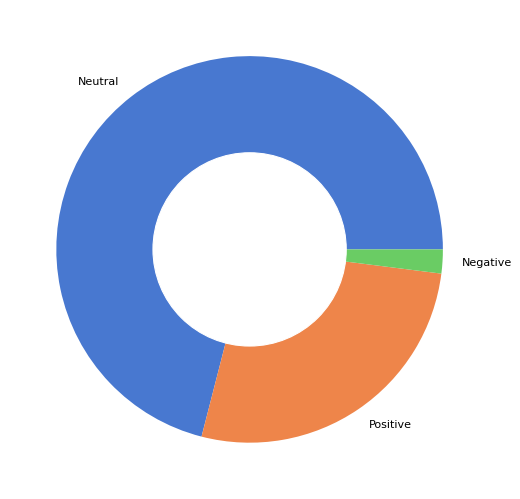

In [24]:
colors = sns.color_palette('muted')
plt.figure(figsize=(13, 8), dpi=80)

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(pred_dict.values(), labels=[labels[i] for i in pred_dict.keys()], colors=colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [25]:
def create_wordcloud(text,path):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    max_words=3000,
    stopwords=stopwords,
    random_state=42,
    width=900, height=500,
    repeat=True)
    wc.generate(str(text))
    wc.to_file(path)
    print("Word Cloud Saved Successfully")
    path=path
    display(Image.open(path))
    plt.show()

### Visualizing of the frequent words as word cloud

Word Cloud Saved Successfully


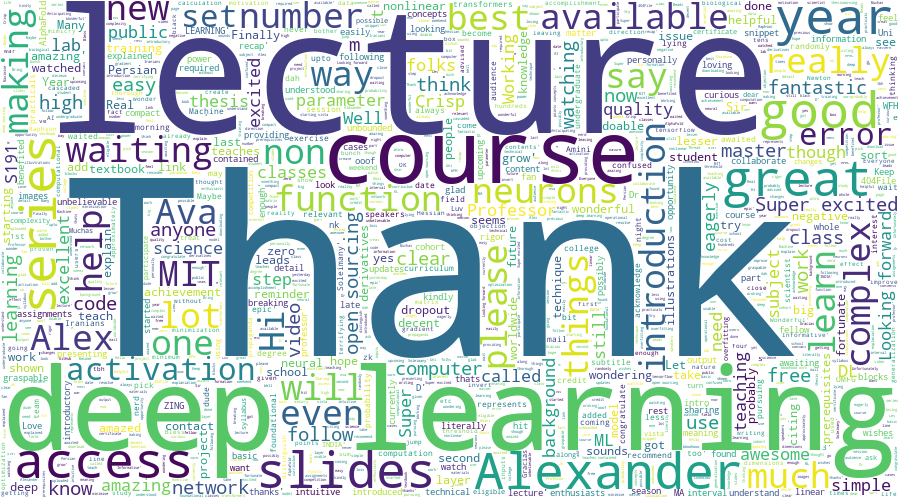

<Figure size 1200x640 with 0 Axes>

In [26]:
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(comments,"all_words.png")
plt.show()